# M.A.D. Supplementals: Principle Component Analysis

<span style="color:red;">**M.A.D.** => **M**achine **L**earning and **D**ata Science<span>

**Purpose:** The purpose of this workbook is to help you get comfortable with the topics outlined below.

**Recomended Usage**
* Run each of the cells (Shift+Enter) and edit them as necessary to solidify your understanding
* Do any of the exercises that are relevant to helping you understand the material

**Topics Covered**
* Principle Component Analysis

# Workbook Setup

## Troubleshooting Tips

If you run into issues running any of the code in this notebook, check your version of Jupyter, extensions, etc.

```bash
!jupyter --version

jupyter core     : 4.6.1
jupyter-notebook : 6.0.2
qtconsole        : not installed
ipython          : 7.9.0
ipykernel        : 5.1.3
jupyter client   : 5.3.4
jupyter lab      : 1.2.3
nbconvert        : 5.6.1
ipywidgets       : not installed
nbformat         : 4.4.0
traitlets        : 4.3.3
```

```bash
!jupyter-labextension list

JupyterLab v1.2.3
Known labextensions:
   app dir: /usr/local/share/jupyter/lab
        @aquirdturtle/collapsible_headings v0.5.0  enabled  OK
        @jupyter-widgets/jupyterlab-manager v1.1.0  enabled  OK
        @jupyterlab/git v0.8.2  enabled  OK
        @jupyterlab/github v1.0.1  enabled  OK
        jupyterlab-flake8 v0.4.0  enabled  OK

Uninstalled core extensions:
    @jupyterlab/github
    jupyterlab-flake8
```

In [1]:
# Run this cell to check the version of Jupyter you are running
#!jupyter --version

In [2]:
# Run one of these cells to check what extensions you are using
#!jupyter-labextension list
#!jupyter-nbextension list

## Notebook Configs

In [3]:
# AUTO GENERATED CELL FOR NOTEBOOK SETUP

# NOTEBOOK WIDE MAGICS

# Reload all modules before executing a new line
%load_ext autoreload
%autoreload 2

# Abide by PEP8 code style
%load_ext pycodestyle_magic
%pycodestyle_on

# LIBRARY SPECIFIC MAGICS - UNCOMMENT AS NEEDED

# Plot all matplotlib plots in output cell and save on close
%matplotlib inline

Plotting multiple 3D vectors at the same time

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import PCA

In [5]:
sns.set()

# Principle Component Analysis

PCA is a linear dimensionality reduction technique; it takes high dimensional data into low dimensional data.

Dimensionality reduction is REALLY important in machine learning and datascience because often times the datasets that we work with have many many features (or dimensions). Being able to reduce these dimensions helps our algorithms run faster and can help us understand correlations in our datasets.

## Understanding PCA

Let's start by thinking about a 3D example and reduce its dimensionality. Take these 500 points plotted on X, Y, Z axis.

In [ ]:
# Create 500 points
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

Lets say we are trying to predict what features are important for ... Logically, if X and Y are dependent then we don't need X and Y and Z we just need 

It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.

Useful for data visualization, speeding up ML algs

## PCA using a 2D Dataset

## PCA on a High-Dimensional Dataset

# EXAMPLE from iwebz

extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

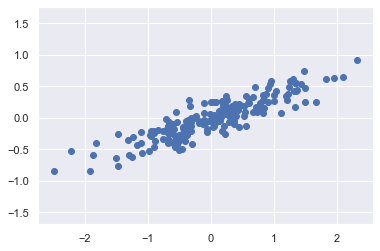

In [6]:
# create 200 points
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [9]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


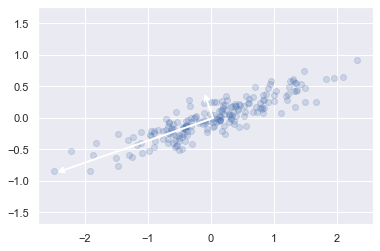

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

In [11]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


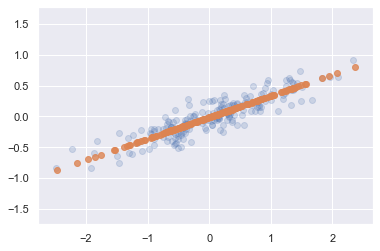

In [12]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');